In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [41]:
# Evaluate the conservation quantity
def f(u):
    value = 0.5 * u**2
    return value

# burgers_time_viscous() solves the time-dependent viscous Burgers equation.
def burgers_time_viscous ( ic_function, nx, nt, t_max, nu, bc ):
#
## Discussion:
#
##   The typical form of the equation is written:
#
##     du/dt + u * du/dx = nu * d^2u/dx^2
#
##   The conservative form of the equation is written:
#
##     du/dt + 1/2 * d(u^2)/dx = nu * d^2u/dx^2
#
##   The space interval is taken to be -1.0 <= x <= +1.0.
#
##   The time interval is taken to be 0 <= t <= t_max.
#  Input:
#
#    function UI = IC_FUNCTION ( X ), a handle to the initial 
#    condition function.
#
#    integer NX, the number of nodes.
#
#    integer NT, the number of time steps.
#
#    real T_MAX, the maximum time.
#
#    real NU, the viscosity.
#
#    integer BC, defines the boundary conditions.
#    0, Dirichlet at A, Dirichlet at B.
#    1, Dirichlet at A, U''= 0 at B.
#    2, U'' = 0 at A, Dirichlet at B.
#    3, U'' = 0 at A, U'' = 0 at B.
#    4, Periodic, U(A) = U(B).
#
#  Output:
#
#    real U(NT+1,NX), the solution at each time and node.
#
    # Spatial discretization
    a = -1.0
    b = +1.0
    dx = (b-a) / nx
    x = np.linspace(a, b, nx)

    # Time discretization
    dt = t_max / nt

    U = np.zeros([nt+1, nx])
    u = np.zeros([1, nx]).reshape(-1)
    unew = np.zeros([1, nx]).reshape(-1)

    u = ic_function(x)
    U[0, :] = u

    # Time marching 
    for i in range(0, nt):
        # Left boundary nodes
        if (bc == 0 or bc == 1):
            unew[0] = u[0]
        elif (bc == 2 or bc == 3):
            ul = 2*u[0] - u[1]
            unew[0] = u[0] + dt*( nu * (u[1] - 2*u[0] + ul)/(dx**2) - (f(u[1]) - f(ul))/dx )
        elif (bc == 4):
            unew[0] = u[0] + dt*( nu * (u[1] - 2*u[0] + u[nx-1])/(dx**2) - (f(u[1]) - f(u[nx-1]))/(2*dx) ) 

        # Interior nodes
        # print(u[1:nx-1].shape, u[2:nx].shape, u[0:nx-2].shape, unew[1:nx-1].shape)
        unew[1:nx-1] = u[1:nx-1] + dt*( nu * (u[2:nx] - 2*u[1:nx-1] + u[0:nx-2])/(dx**2) - (f(u[2:nx]) - f(u[0:nx-2]))/(2*dx) )

        # Right boundary nodes
        if (bc == 0 or bc == 1):
            unew[nx-1] = u[nx-1]
        elif (bc == 2 or bc == 3):
            ur = 2*u[nx-1] - u[nx-2]
            unew[nx-1] = u[nx-1] + dt*( nu * (ur - 2*u[nx-1] + u[nx-2])/(dx**2) - (f(ur) - f(u[nx-2]))/dx )
        elif (bc == 4):
            unew[nx-1] = u[nx-1] + dt*( nu * (u[0] - 2*u[nx-1] + u[nx-2])/(dx**2) - (f(u[0]) - f(u[nx-2]))/(2*dx) )
        
        u = unew
        U[i+1, :] = u

    return U

### Test case 1
tests burgers_time_viscous() with the gaussian initial condition.

In [42]:
def ic_gaussian(x):
    return  np.exp ( - 2.0 * x**2 )

nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 4

U = burgers_time_viscous(ic_gaussian, nx, nt, t_max, nu, bc)

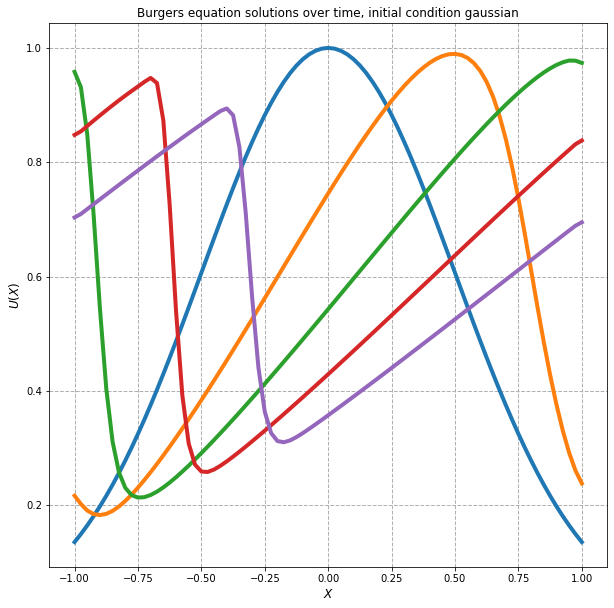

In [67]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition gaussian')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test01.png')
plt.show()

### Test case 2
tests burgers_time_viscous() with the gaussian initial condition.

In [70]:
nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 0

U = burgers_time_viscous(ic_gaussian, nx, nt, t_max, nu, bc)

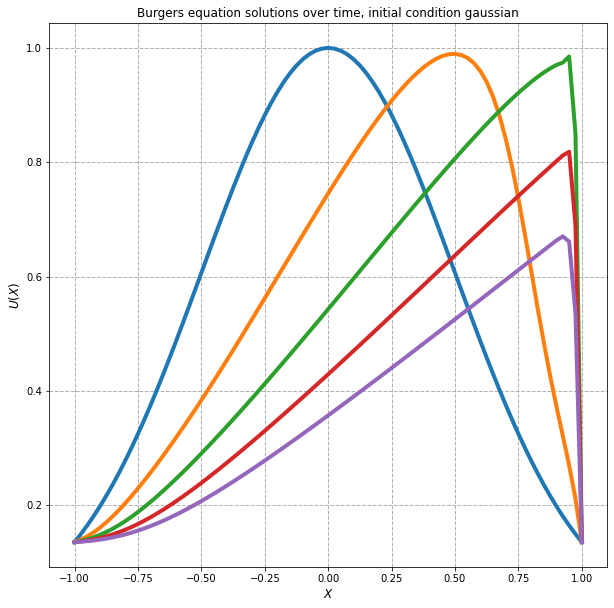

In [71]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition gaussian')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test02.png')
plt.show()

### Test case 3
tests burgers_time_viscous() with the gaussian initial condition.

In [72]:
nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 3

U = burgers_time_viscous(ic_gaussian, nx, nt, t_max, nu, bc)

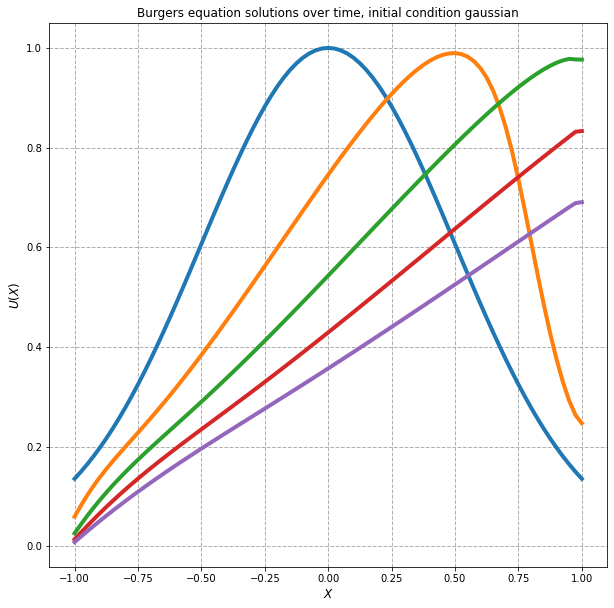

In [73]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition gaussian')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test03.png')
plt.show()

### Test case 4
Test BURGERS_TIME_VISCOUS with the shock initial condition.

Use periodic boundaries.


In [89]:
def ic_shock(x):
    return x <= 0.0

nx = 81
nt = 300
t_max = 3.0
nu = 0.01
bc = 4

U = burgers_time_viscous(ic_shock, nx, nt, t_max, nu, bc)

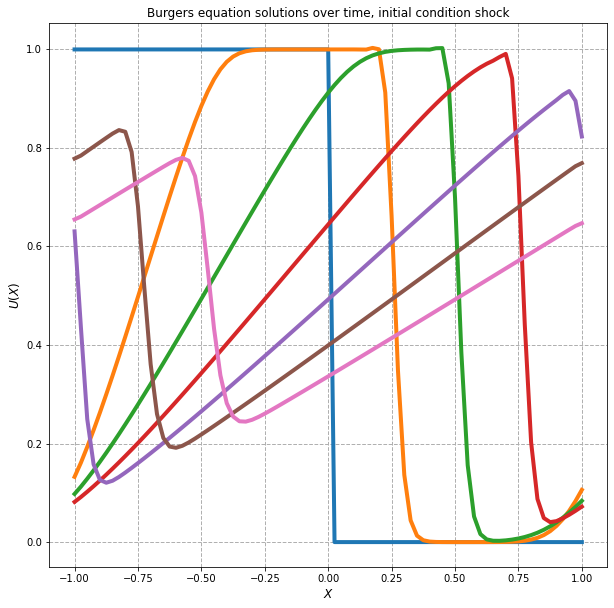

In [90]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition shock')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test04.png')
plt.show()

### Test case 5
Test BURGERS_TIME_VISCOUS with the expansion initial condition.
  
Use periodic boundaries.

In [87]:
def ic_expansion(x):
    ul = 0.5
    ur = 1.0

    ui = 1.0 - 0.5 * ( x <= 0.0 )
    
    return ui

nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 4

U = burgers_time_viscous (ic_expansion, nx, nt, t_max, nu, bc );


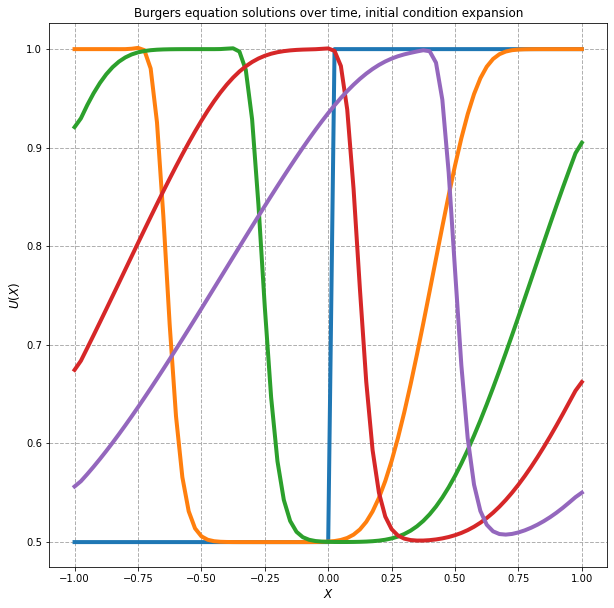

In [88]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition expansion')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test05.png')
plt.show()

### Test case 6
Test BURGERS_TIME_VISCOUS with the spline initial condition.

Use periodic boundaries.

In [78]:
from scipy.interpolate import UnivariateSpline

In [83]:
def ic_spline(x):
    xk = [ -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6,  0.8, 1.0 ]
    uk = [  0.0,  1.0,  0.0, -0.6,  0.1, 0.8, 0.7, 1.0, 0.2, -0.4, 0.0 ]

    pp = UnivariateSpline( xk, uk, k = 5)
    ui = pp(x)
    
    return ui

nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 4

U = burgers_time_viscous (ic_spline, nx, nt, t_max, nu, bc )

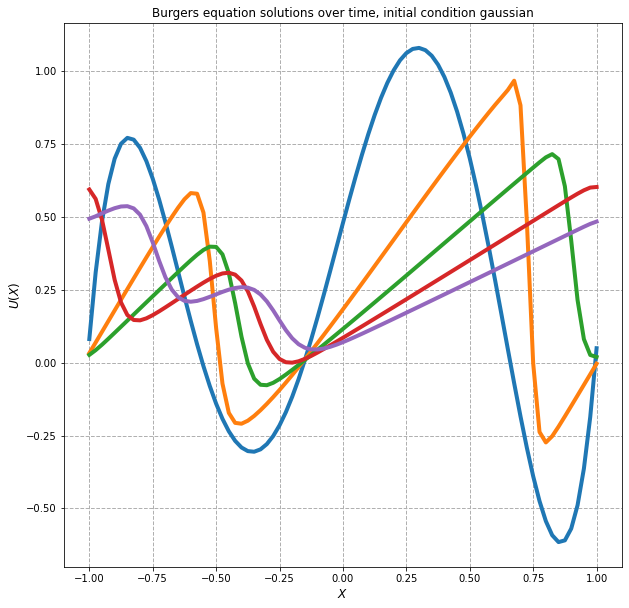

In [85]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition gaussian')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test06.png')
plt.show()

### Test 7
Test BURGERS_TIME_VISCOUS with the gaussian initial condition.

Plot the solutions U(X,T) as a surface.

In [92]:
nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 4

U = burgers_time_viscous (ic_gaussian, nx, nt, t_max, nu, bc )

In [102]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

In [101]:
%matplotlib widget

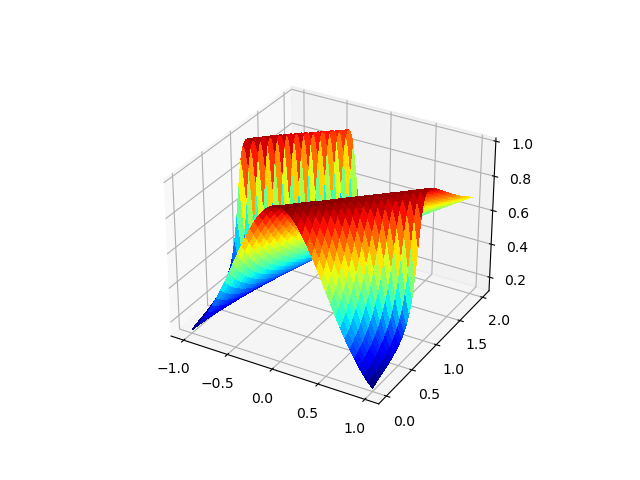

In [109]:
fig = plt.figure()
ax = Axes3D(fig)

ax = fig.add_subplot(projection = '3d')

x = np.linspace(-1.0, +1.0, nx)
t = np.linspace(0.0, t_max, nt+1)
x, t = np.meshgrid(x, t)

# Plot the surface.
surf = ax.plot_surface(x, t, U, cmap=cm.jet,
                       linewidth=0, antialiased=False)

plt.savefig('./py_btv_test07.png')

### Test 8
Test BURGERS_TIME_VISCOUS with the spline initial condition.

Use periodic boundaries.

Plot the solution profile at the final time.

In [111]:
nx = 81
nt = 200
t_max = 2.0
nu = 0.01
bc = 4

U = burgers_time_viscous (ic_spline, nx, nt, t_max, nu, bc )

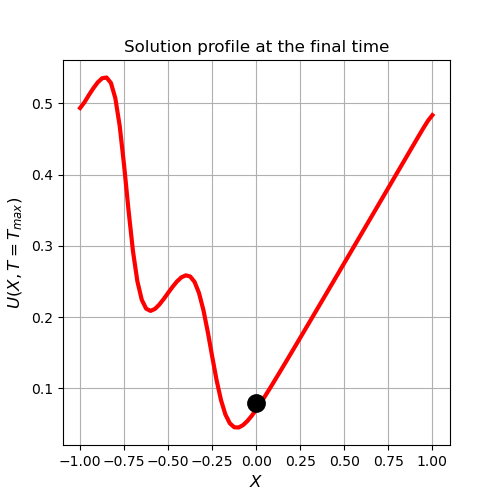

In [118]:
x = np.linspace(-1.0, 1.0, nx)

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, U[nt, :], 'r-', linewidth=3)
ax.plot(0.0, U[nt, int(np.floor((nx+1)/2))], 'k.', markersize=25)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X, T = T_{max})$', fontsize=12)

ax.set_title('Solution profile at the final time')
ax.grid('--')
plt.savefig('./py_btv_test08.png')
plt.show()

### Test case 9

Test BURGERS_TIME_VISCOUS with the spike initial condition.

Periodic boundary condition

In [128]:
def ic_spike(x):
    ui = np.maximum(1.0 - 3.0 * np.abs(x), 0.0)

    return ui

nx = 81
nt = 400
t_max = 4.0
nu = 0.01
bc = 4

U = burgers_time_viscous (ic_spike, nx, nt, t_max, nu, bc)

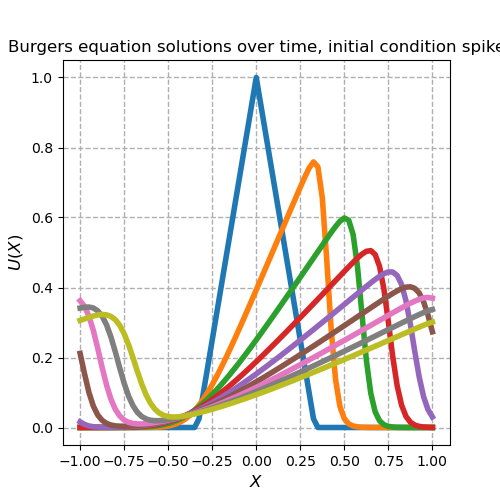

In [130]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(0, nt+1, 50):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition spike')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test09.png')
plt.show()

### Test case 10
Test BURGERS_TIME_VISCOUS with the shock initial condition.

BC: U(left)=0, U''(right)=0 boundary.

In [131]:
nx = 800
nt = 10000
t_max = 2.0
nu = 0.01
bc = 1

U = burgers_time_viscous (ic_shock, nx, nt, t_max, nu, bc )

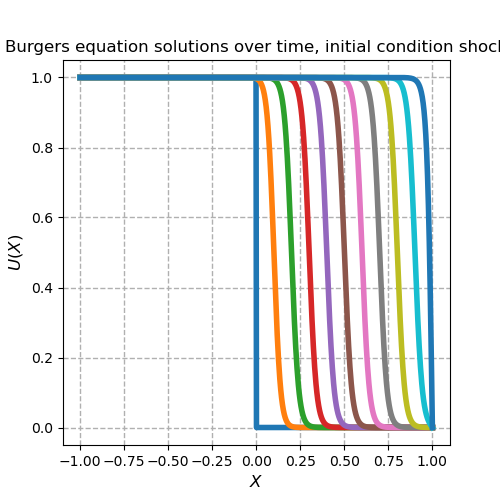

In [132]:
x = np.linspace(-1.0, +1.0, nx)

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(0, nt+1, 1000):
    ax.plot(x, U[i, :], linewidth = 4)

ax.set_xlabel ('$X$', fontsize=12)
ax.set_ylabel ('$U(X)$', fontsize=12)

ax.set_title('Burgers equation solutions over time, initial condition shock')
ax.grid(linestyle='--', linewidth=1)
plt.savefig('./py_btv_test10.png')
plt.show()